In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

In [2]:
def acc_metrics(act,pred):
    print('MAPE: ',mean_absolute_percentage_error(act,pred))
    print('R2_Score: ',r2_score(act,pred))
    print('MSE: ',mean_squared_error(act,pred))

In [3]:
df = pd.read_csv('Marketing_Data.csv')

In [4]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
df.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

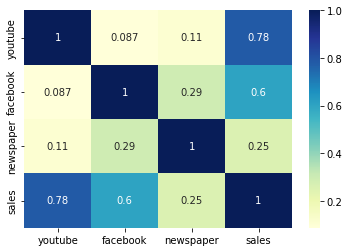

In [6]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns='sales'),df.sales,test_size=0.25)

# Linear Models

## Linear Regression

In [8]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [9]:
acc_metrics(y_train,model_lr.predict(x_train))

MAPE:  0.14773718194393418
R2_Score:  0.891227850707494
MSE:  3.870862739252784


In [10]:
pred_lr = model_lr.predict(x_test)

In [11]:
acc_metrics(y_test,pred_lr)

MAPE:  0.1309380033627604
R2_Score:  0.9136168009061204
MSE:  4.374793239042114


## Lasso Regression

In [12]:
model_ls = Lasso(alpha=0.1)
model_ls.fit(x_train,y_train)

Lasso(alpha=0.1)

In [13]:
acc_metrics(y_train,model_ls.predict(x_train))

MAPE:  0.14765703012501924
R2_Score:  0.8912266548332167
MSE:  3.870905296701645


In [14]:
pred_ls = model_ls.predict(x_test)

In [15]:
acc_metrics(y_test,pred_ls)

MAPE:  0.13072391632473082
R2_Score:  0.9137529913693443
MSE:  4.367896005274628


In [16]:
acc_train = []
acc_test = []
for alpha in np.arange(0.1,1,0.1):
    model_ls = Lasso(alpha=alpha)
    model_ls.fit(x_train,y_train)
    acc_train.append(mean_squared_error(model_ls.predict(x_train),y_train))
    acc_test.append(mean_squared_error(model_ls.predict(x_test),y_test))

In [17]:
print(acc_train)

[3.870905296701645, 3.8710330100070376, 3.871245879173403, 3.871543904200741, 3.8719270850890517, 3.8723954218383354, 3.8729489144485925, 3.8735875629198224, 3.8743113672520226]


In [18]:
print(acc_test)

[4.367896005274628, 4.361130357977452, 4.354496649335743, 4.3479948793495, 4.341625048018721, 4.3353871553434065, 4.329281201323552, 4.323307185959166, 4.317465109250241]


In [19]:
print(acc_train.index(min(acc_train)))
print(acc_test.index(min(acc_test)))

0
8


In [20]:
acc_train[acc_train.index(min(acc_train))]

3.870905296701645

In [21]:
acc_test[acc_test.index(min(acc_test))]

4.317465109250241

## Ridge Regression

In [22]:
model_ri = Ridge(alpha=7)
model_ri.fit(x_train,y_train)

Ridge(alpha=7)

In [23]:
acc_metrics(y_train,model_ri.predict(x_train))

MAPE:  0.1477278400549527
R2_Score:  0.891227839922783
MSE:  3.870863123047132


In [24]:
pred_ri = model_ri.predict(x_test)

In [25]:
acc_metrics(y_test,pred_ri)

MAPE:  0.13092338983947138
R2_Score:  0.9136206017145803
MSE:  4.374600750788293


In [26]:
acc_train = []
acc_test = []
for alpha in np.arange(1,20000,10):
    model_ri = Ridge(alpha=alpha)
    model_ri.fit(x_train,y_train)
    acc_train.append(mean_squared_error(model_ri.predict(x_train),y_train))
    acc_test.append(mean_squared_error(model_ri.predict(x_test),y_test))

In [27]:
acc_train[acc_train.index(min(acc_train))]

3.8708627470880352

In [28]:
acc_test[acc_test.index(min(acc_test))]

4.354541354811342

# Conclusion

## Comparing the MAPE and MSE for all 3 models, we can say that all 3 models are suitable for the given data. In our trial Lasso Regression gave the best MAPE and MSE scores